# Logistic Regression


In [105]:
#import packages
import pandas as pd
import numpy as np


In [106]:
#reading data from website
cvd = pd.read_csv('https://raw.githubusercontent.com/ArinB/CA05-B-Logistic-Regression/master/cvd_data.csv')
cvd

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
0,0,54,1,2,1,110.0,40.0,108.0,87.5,34.0,0,1,0,1,2,3,4
1,0,56,3,2,1,113.0,34.0,107.0,83.5,0.0,0,0,0,2,2,1,3
2,0,54,1,3,1,110.0,44.5,105.0,86.2,49.5,0,0,0,3,2,6,4
3,0,54,1,3,1,129.0,42.5,110.0,89.1,0.0,0,0,0,3,2,1,3
4,0,51,3,2,1,122.0,37.0,113.0,81.3,0.0,0,0,0,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3237,1,66,1,2,1,95.0,41.5,99.0,88.2,0.0,0,1,0,2,2,5,4
3238,1,54,1,3,1,99.0,34.9,99.0,83.3,30.0,0,0,0,3,3,3,4
3239,1,55,1,4,1,101.0,37.0,91.0,75.2,0.0,0,0,0,3,2,5,4
3240,1,53,1,2,1,98.0,39.0,93.0,79.0,0.0,0,0,0,2,2,5,4


In [107]:
#check missing values
cvd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3242 entries, 0 to 3241
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cvd_4types    3242 non-null   int64  
 1   age_s1        3242 non-null   int64  
 2   race          3242 non-null   int64  
 3   educat        3242 non-null   int64  
 4   mstat         3242 non-null   int64  
 5   hip           3242 non-null   float64
 6   neck20        3242 non-null   float64
 7   waist         3242 non-null   float64
 8   av_weight_kg  3242 non-null   float64
 9   cgpkyr        3242 non-null   float64
 10  tea15         3242 non-null   int64  
 11  srhype        3242 non-null   int64  
 12  parrptdiab    3242 non-null   int64  
 13  bend25        3242 non-null   int64  
 14  happy25       3242 non-null   int64  
 15  tired25       3242 non-null   int64  
 16  hlthlm25      3242 non-null   int64  
dtypes: float64(5), int64(12)
memory usage: 430.7 KB


In [108]:
cvd.isnull().sum()

cvd_4types      0
age_s1          0
race            0
educat          0
mstat           0
hip             0
neck20          0
waist           0
av_weight_kg    0
cgpkyr          0
tea15           0
srhype          0
parrptdiab      0
bend25          0
happy25         0
tired25         0
hlthlm25        0
dtype: int64

In [109]:
cvd.columns

Index(['cvd_4types', 'age_s1', 'race', 'educat', 'mstat', 'hip', 'neck20',
       'waist', 'av_weight_kg', 'cgpkyr', 'tea15', 'srhype', 'parrptdiab',
       'bend25', 'happy25', 'tired25', 'hlthlm25'],
      dtype='object')

In [110]:
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

In [111]:
x = cvd[['age_s1', 'race', 'educat', 'mstat', 'hip', 'neck20',
       'waist', 'av_weight_kg', 'cgpkyr', 'tea15', 'srhype', 'parrptdiab',
       'bend25', 'happy25', 'tired25', 'hlthlm25']]
y = cvd['cvd_4types']

In [112]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

# Part 1: build a binary classifier model to predict the CVD Risk (Yes/No, or 1/ 0) using a Logistic Regression Model with the best performance possible

In [113]:
logreg = LogisticRegression()

# fit the model with data
logreg.fit(x_train,y_train)

y_pred=logreg.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Part 2: Display the Feature Importance of all the features sorted in the order of decreasing influence on the CVD Risk

In [114]:
m = LogisticRegression()
m.fit(x_train, y_train)
m.fit(x_train / np.std(x_train,0),y_train)
sorted(m.coef_, reverse=True)
print(m.coef_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[[ 0.02213101 -0.34656643  0.19697291 -0.15775608 -0.67901886 -0.25425855
   1.23325671 -0.23401906 -0.02407152 -0.04099397  0.11599844  0.16187786
   0.10145924 -0.01745048  0.13313041 -0.37204249]]


# Part 3: Evaluate the performance of your model (including ROC Curve), explain the performance and draw a meaningful conclusion.

In [115]:
#confusion matrix
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix

array([[181, 207],
       [116, 469]])

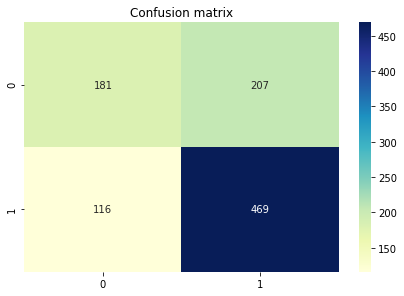

In [116]:
#heat map
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.show()

In [117]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.47      0.53       388
           1       0.69      0.80      0.74       585

    accuracy                           0.67       973
   macro avg       0.65      0.63      0.64       973
weighted avg       0.66      0.67      0.66       973



In [118]:
#accuracy
acc = metrics.accuracy_score(y_test, y_pred)
acc

0.6680369989722508

In [119]:
#precision
pre = metrics.precision_score(y_test, y_pred)
pre

0.6937869822485208

In [120]:
#recall
rec = metrics.recall_score(y_test, y_pred)
rec

0.8017094017094017

In [121]:
#calculate ROC
fpr, tpr, _ = roc_curve(y_test, y_pred)

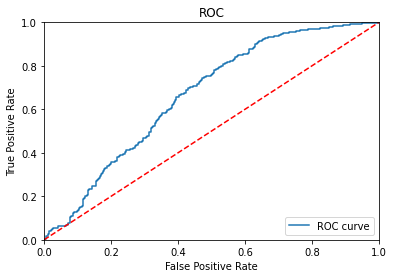

In [122]:
#ROC curve
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.title('ROC')
plt.plot(fpr, tpr, label = 'ROC curve')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

In [123]:
#AUC
auc

0.6651202749140894